# Email Spam Classifier 

In [212]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as plt
import string 
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [213]:
os.listdir('/Users/KBrig/ML-Pipeline')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'ML-Pipeline',
 'ML-Pipeline.ipynb',
 'README.md',
 'Spam.csv']

# Data Reading and Exploring 

In [214]:
path='/Users/KBrig/ML-Pipeline/spam.csv'
#EmData= pd.read_csv('Spam.csv',encoding='cp1252')
EmData= pd.read_csv(path,encoding='cp1252',dtype={'type':np.str, 'Email_body':np.str})

In [215]:
EmData.head()

,type,Email_body,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [216]:
EmData=EmData[['type','Email_body']]

In [217]:
EmData.head(3)

,type,Email_body
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [218]:
#print(EmData.shape)
for col in EmData.columns:
    print ('column', col,':', type(col[0]))

column type : <class 'str'>
column Email_body : <class 'str'>


In [219]:
EmData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
type          5572 non-null object
Email_body    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [220]:
EmData.groupby('type').describe()

Email_body                                                               
          count unique                                                top freq
type                                                                          
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

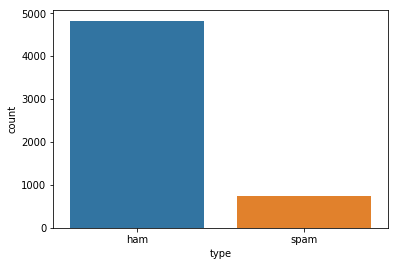

In [221]:
sns.countplot(x='type',data=EmData)

Unsurprisingly, we have much more "ham" emails than of the spam type!

In [222]:
EmData['y']=EmData['type'].apply(lambda x: x =='spam').astype(int)

In [223]:
EmData.head()

,type,Email_body,y
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [224]:
EmData['Email_body']=EmData['Email_body'].astype('str',copy=True)
#EmData['Email_body']=EmData['Email_body'].astype('|S')

In [225]:
EmData['lngth']= EmData['Email_body'].apply(len)
#EmData.assign(ln_massg = lambda x: np.len(x.Email_body))

In [226]:
EmData.head()

,type,Email_body,y,lngth
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


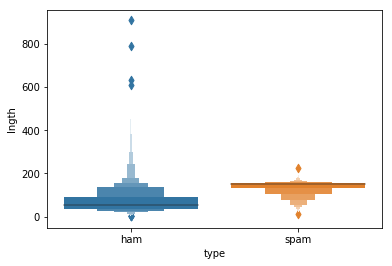

In [227]:
sns.boxenplot(x='type',y='lngth', data=EmData)


From the previous plot, we can notice that the "ham" class has much longer messages than those of the "spam" type!

# Feature Vectorization

In order to apply the ML classification algorithms, we need to transform our raw data (text) into vectors (Numerical Data)which is known as Tokenaization

In [228]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

We are going to apply a simple technique known as "Bag of Words" for vectorizing our messages.

In [229]:
#Count how many times does a word occur in each message (Known as term frequency)
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer()

#Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)
#Normalize the vectors to unit length, to abstract from the original text length (L2 norm)
## TfidfTransformer()

from sklearn.feature_extraction.text import TfidfTransformer


In [230]:
b = vect.transform([EmData['Email_body'][3]])
b

<1x8673 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

# Spliting Data into Training and Test Sets

In [231]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(EmData['Email_body'], EmData['type'], test_size=0.3)


# Building ML Pipeline with Logistic Regression Classifier

In [232]:
from sklearn.linear_model import LogisticRegression
pipeline_LR = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial')),  # train on TF-IDF vectors with Logistic Regression classifier
])


In [233]:
pipeline_LR.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip..., penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False))])

In [234]:
predictions_LR = pipeline_LR.predict(x_test)

In [235]:
print(classification_report(predictions_LR,y_test))

             precision    recall  f1-score   support

        ham       1.00      0.98      0.99      1475
       spam       0.85      0.98      0.91       197

avg / total       0.98      0.98      0.98      1672



# Building ML Pipeline with Naieve Bayes Classifier

In [236]:
from sklearn.naive_bayes import MultinomialNB

pipeline_NB = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', MultinomialNB()),  # train on TF-IDF vectors with Naive Bayes classifier
])


In [237]:
pipeline_NB.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...inear_tf=False, use_idf=True)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [238]:
predictions_NB = pipeline_NB.predict(x_test)

In [239]:
print(classification_report(predictions_NB,y_test))

             precision    recall  f1-score   support

        ham       1.00      0.95      0.97      1521
       spam       0.67      1.00      0.80       151

avg / total       0.97      0.95      0.96      1672



# Building ML Pipeline with SVM Classifier

In [240]:
from sklearn.linear_model import SGDClassifier

pipeline_SVM = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),  # train on TF-IDF vectors with Naive Bayes classifier
])


In [241]:
pipeline_SVM.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False))])

In [242]:
predictions_SVM = pipeline_SVM.predict(x_test)

In [243]:
print(classification_report(predictions_SVM,y_test))

             precision    recall  f1-score   support

        ham       1.00      0.98      0.99      1477
       spam       0.85      0.98      0.91       195

avg / total       0.98      0.98      0.98      1672



# Building ML Pipeline with Decision Trees Classifier

In [244]:
from sklearn import tree

pipeline_DT = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', tree.DecisionTreeClassifier()),  # train on TF-IDF vectors with DT classifier
])


In [245]:
pipeline_DT.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [246]:
predictions_DT = pipeline_DT.predict(x_test)

In [247]:
print(classification_report(predictions_DT,y_test))

             precision    recall  f1-score   support

        ham       0.99      0.97      0.98      1467
       spam       0.83      0.92      0.87       205

avg / total       0.97      0.97      0.97      1672



In [249]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\KBrig\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [250]:
pipeline_Ens = Pipeline([
    ('vect', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('clf', RandomForestClassifier(n_estimators=10)),  # train on TF-IDF vectors with Ensample methods "Randomized DTs" classifier
])

In [251]:
pipeline_Ens.fit(x_train,y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [252]:
predictions_Ens = pipeline_Ens.predict(x_test)

In [253]:
print(classification_report(predictions_Ens,y_test))

             precision    recall  f1-score   support

        ham       1.00      0.97      0.98      1493
       spam       0.78      0.99      0.88       179

avg / total       0.98      0.97      0.97      1672

